## Foundations of Machine Learning Frameworks 


**LAB1-Univariate Linear Regression on the California Housing Prices Dataset**

**INTRODUCTION**

The goal of this investigation is to create a univariate linear regression model that takes into account three independent variables: population, number of households, and median income, in order to predict the median house value in California. To suggest the ideal predictor, we shall assess each model's performance.

**DATA**

Dataset: Based on information from the 1990 census, the data relates to the homes that are located in a specific California district and includes some summary statistics about them. Note that certain preparation steps are necessary because the data haven't been cleansed!
The dataset has been taken from https://www.kaggle.com/datasets/camnugent/california-housing-prices

The following columns are listed, and their titles should go without saying:

1. **longitude:** A house's longitude is its westward measure; a higher number indicates a further west location.
2. **latitude:** The northernmost point of a home indicated by a higher latitude value
3. **housingMedianAge:** Median age of a house within a block; a lower number is a newer building
4. **totalRooms:** The total number of rooms in a block.
5. **totalBedrooms:** The total amount of bedrooms in an apartment building.
6. **population:** The total population living in a block.
7. **households:** Total number of households, a group of people residing within a home unit, for a block
8. **medianIncome:** Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. **medianHouseValue:** Median house value for households within a block (measured in US Dollars)
10. **oceanProximity:** Location of the house w.r.t ocean/sea

**Loading Dataset**

In [4]:
import pandas as pd
data = pd.read_csv("C://Users//Tejaswini Marolia//Downloads//housing.csv//housing.csv")
data.head()


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

**Exploratory Data Analysis (EDA)**

In [5]:
data.describe()


longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

**Scatter Plots**

1. Median House Value vs. Median Income

    The scatter plot indicates that the median income and house value appear to be strongly positively correlated. The value of the median house tends to rise dramatically along with the median income.In the univariate linear regression model, this suggests that median income could be a reliable predictor of house prices, with higher salaries translating into higher property values.

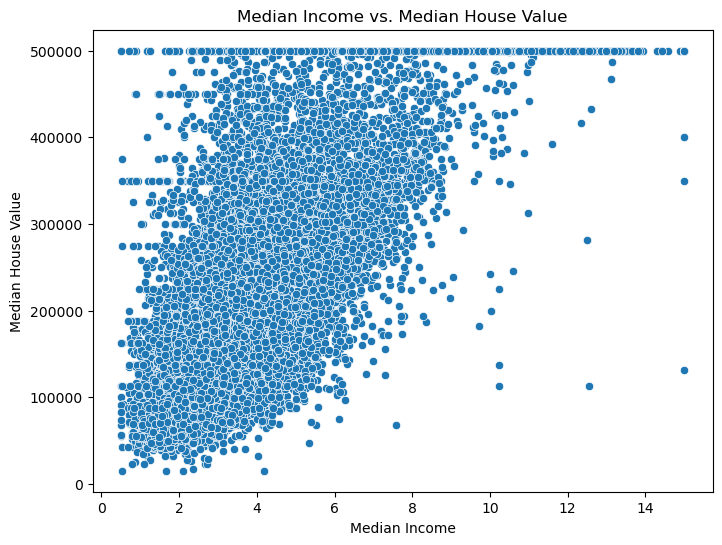

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for Median Income vs. Median House Value
plt.figure(figsize=(8, 6))
sns.scatterplot(x='median_income', y='median_house_value', data=data)
plt.title('Median Income vs. Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

2. Median House Value vs. Population
    
    Comparing median income to population, the relationship between the two seems to be substantially weaker. There is no discernible pattern or broad distribution of the points that would indicate a robust correlation between housing value and population size.It is probable that under the univariate linear regression model, population will not be as significant a predictor of housing prices.

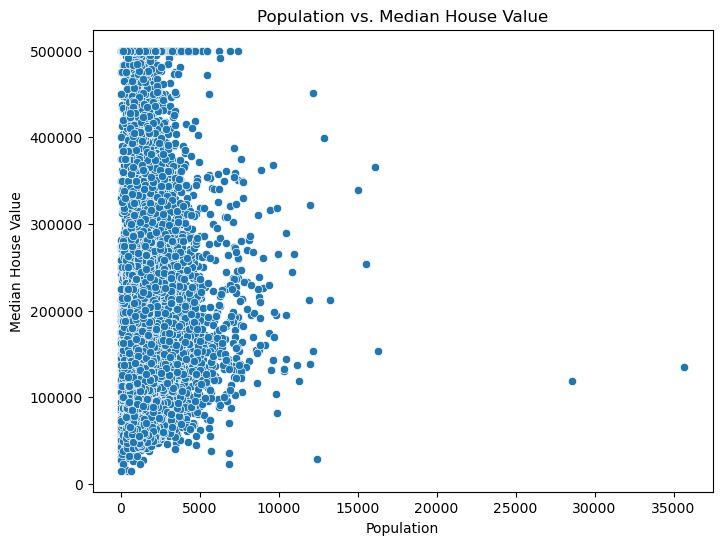

In [8]:
# Scatter plot for Population vs. Median House Value
plt.figure(figsize=(8, 6))
sns.scatterplot(x='population', y='median_house_value', data=data)
plt.title('Population vs. Median House Value')
plt.xlabel('Population')
plt.ylabel('Median House Value')
plt.show()


3. Median House Value vs. Number of Households

    The number of households and median house value have a somewhat positive link, according to the scatter plot, however it is not as evident or strong as it is for median income.
    In the model, the number of households may still have some predictive value, but it may not have the same impact on house prices as the median income.

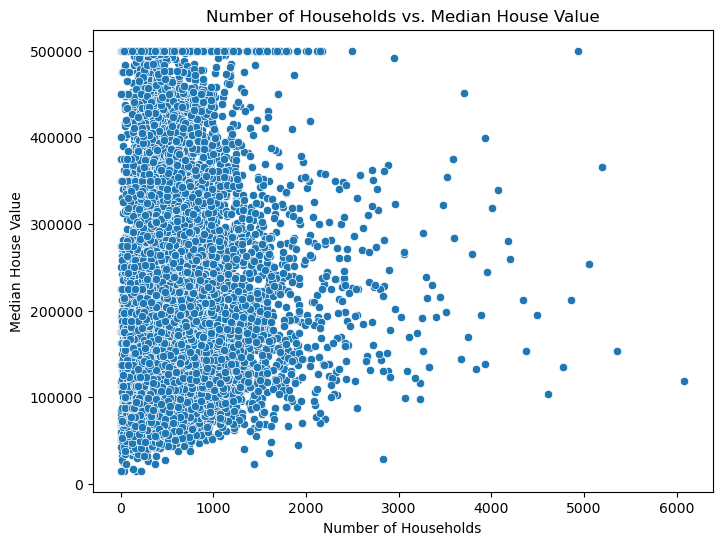

In [9]:
# Scatter plot for Number of Households vs. Median House Value
plt.figure(figsize=(8, 6))
sns.scatterplot(x='households', y='median_house_value', data=data)
plt.title('Number of Households vs. Median House Value')
plt.xlabel('Number of Households')
plt.ylabel('Median House Value')
plt.show()


**Variables used in the lab**

1. **Median House Value (Target Variable)** :indicates the average cost of a home in a certain area.
   - **Range**: usually fluctuates from $14,999 and $500,000.
   - **Observation**: By employing additional features, we hope to forecast this dependent variable. The price ceiling in many places is ~$500,001, suggesting that there may be an upper limit to the dataset.

2. **Median Income (Independent Variable)**: A measure of the typical household income in a certain area expressed in tens of thousands of dollars.
   - **Range**: ranges roughly between \$0.5 and \$15.0 (that is, \$5,000 and \$150,000).
   - **Observation**: The median income and median house value have a robust positive association. House prices typically rise in tandem with income.
3. **Population (Independent Variable)**:The whole population of a specific territory.
   - **Range**: From extremely small numbers (about 3) to very big ones (about 35,000), the range is wide.
   - **Observation**:There is little evidence to suggest that population size is a reliable indicator of house prices on its own. This association between population and house value is weak.
4. **Number of Households (Independent Variable)**:The whole population of a specific territory.
   - **Range**:  Approximately 1–6,000 households.
   - **Observation**:Although not as strong as the association with median income, there is a little positive correlation between the number of households and house value.


   From the observed correlations, it is clear that median income is the most significant predictor of house value, even if these variables offer a variety of housing and demographic parameters.



## Three linear regressions (fitting) 

In [11]:
#Importing libraries 
from sklearn.linear_model import LinearRegression # Import Linear Regression
from sklearn.metrics import mean_squared_error, mean_absolute_error # Metrics for evaluation
import numpy as np
import pandas as pd  # For data handling

1. Linear Regression: Median House Value vs. Median Income

In [16]:
# Prepare the independent and dependent variables
X_income = data[['median_income']]
y = data['median_house_value']

# Create and fit the model
model_income = LinearRegression()
model_income.fit(X_income, y)

# Predictions
pred_income = model_income.predict(X_income)

# Calculate the intercept, slope, MSE, and MAE
intercept_income = model_income.intercept_
slope_income = model_income.coef_[0]
mse_income = mean_squared_error(y, pred_income)
mae_income = mean_absolute_error(y, pred_income)

# Output the results
print(f"Households Model:\n"
      f"Intercept: {intercept_income}\n"
      f"Slope: {slope_income}\n"
      f"MSE: {mse_income}\n"
      f"MAE: {mae_income}")


Households Model:
Intercept: 45085.5767032679
Slope: 41793.849201896286
MSE: 7011311502.929527
MAE: 62625.9337911434


2. Linear Regression: Median House Value vs. Population

In [23]:
# Prepare the independent and dependent variables
X_population = data[['population']]
y = data['median_house_value']

# Create and fit the model
model_population = LinearRegression()
model_population.fit(X_population, y)

# Predictions
pred_population = model_population.predict(X_population)

# Calculate the intercept, slope, MSE, and MAE
intercept_population = model_population.intercept_
slope_population = model_population.coef_[0]
mse_population = mean_squared_error(y, pred_population)
mae_population = mean_absolute_error(y, pred_population)

# Output the results
print(f"Population Model:\n"
      f"Intercept: {intercept_population}\n"
      f"Slope: {slope_population}\n" 
      f"MSE: {mse_population}\n"
      f"MAE: {mae_population}\n")


Population Model:
Intercept: 210436.2620762733
Slope: -2.5117527746150685
MSE: 13307412412.389355
MAE: 91153.82009473181



3. Linear Regression: Median House Value vs. Number of Households

In [24]:
# Prepare the independent and dependent variables
X_households = data[['households']]
y = data['median_house_value']

# Create and fit the model
model_households = LinearRegression()
model_households.fit(X_households, y)

# Predictions
pred_households = model_households.predict(X_households)
  
# Calculate the intercept, slope, MSE, and MAE
intercept_households = model_households.intercept_
slope_households = model_households.coef_[0]
mse_households = mean_squared_error(y, pred_households)
mae_households = mean_absolute_error(y, pred_households)

# Output the results
print(f"Households Model:\n"
      f"Intercept: {intercept_households}\n"
      f"Slope: {slope_households}\n" 
      f"MSE: {mse_households}\n"
      f"MAE: {mae_households}")


Households Model:
Intercept: 196928.57716233088
Slope: 19.872775155643836
MSE: 13257776904.728533
MAE: 90802.74324318446


| Variable               | Intercept          | Slope                 | MSE                  | MAE                  |
|------------------------|---------------------|-----------------------|----------------------|----------------------|
| Median Income          | 196928.57716233088  | 19.872775155643836    | 13257776904.728533   | 90802.74324318446    |
| Population             | 210436.2620762733   | -2.5117527746150685   | 13307412412.389355   | 91153.82009473181    |
| Number of Households   | 45085.5767032679    | 41793.849201896286    | 7011311502.929527    | 62625.9337911434     |


In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# For Median Income
X = data[['median_income']]
y = data['median_house_value']
model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)

# Metrics
mse = mean_squared_error(y, predictions)
mae = mean_absolute_error(y, predictions)
intercept = model.intercept_
slope = model.coef_

#print(f'Model intercept: {intercept}, slope: {slope}, MSE: {mse}, MAE: {mae}')


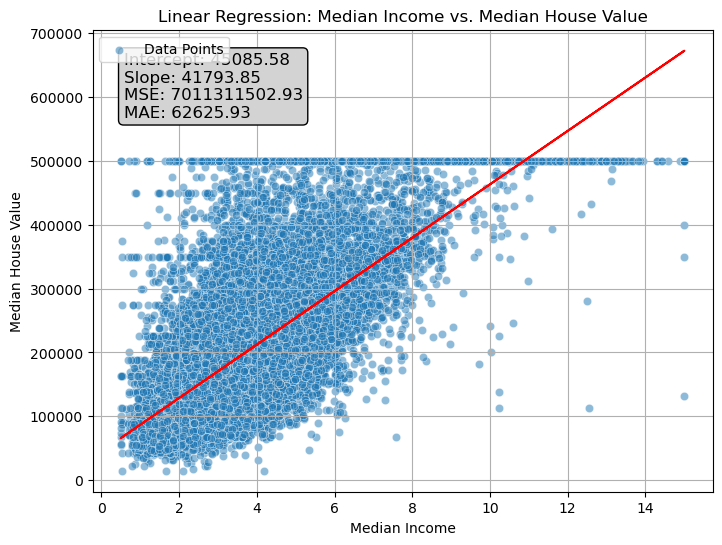

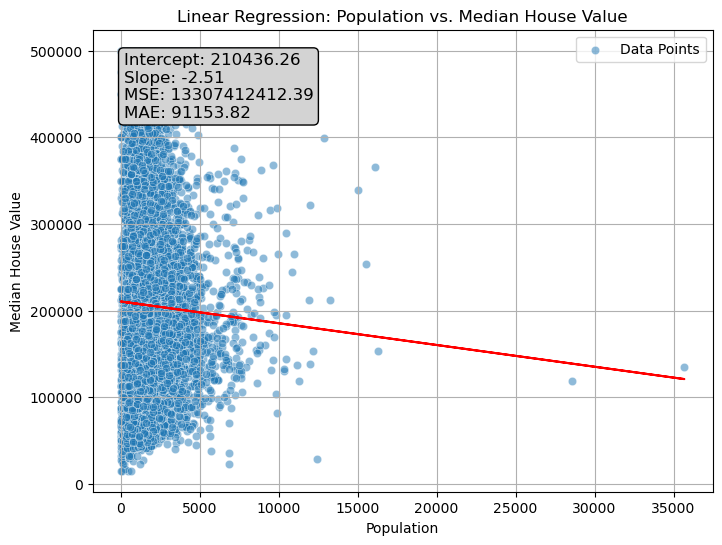

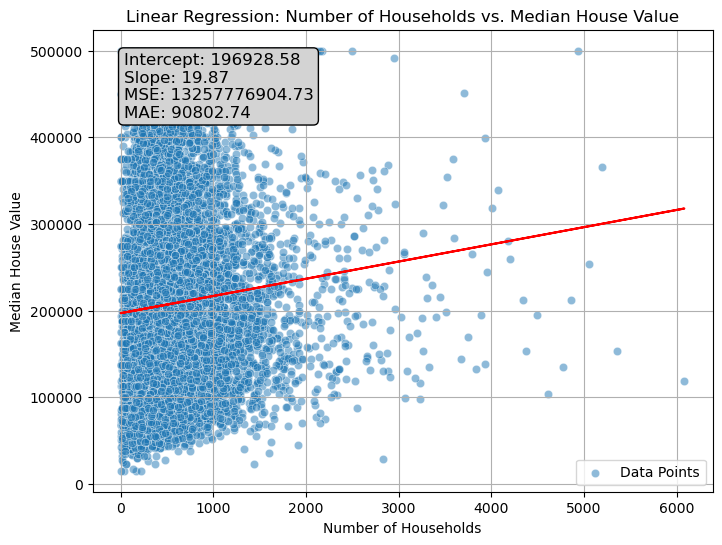

In [30]:
# Prepare the variables for each model
models_info = {
    'Median Income': {
        'X': data[['median_income']],
        'y': data['median_house_value']
    },
    'Population': {
        'X': data[['population']],
        'y': data['median_house_value']
    },
    'Number of Households': {
        'X': data[['households']],
        'y': data['median_house_value']
    }
}

# Create plots
for title, model in models_info.items():
    # Create and fit the model
    model_reg = LinearRegression()
    model_reg.fit(model['X'], model['y'])
    
    # Predictions
    predictions = model_reg.predict(model['X'])
    
    # Calculate metrics
    intercept = model_reg.intercept_
    slope = model_reg.coef_[0]
    mse = mean_squared_error(model['y'], predictions)
    mae = mean_absolute_error(model['y'], predictions)

    # Create the scatter plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=model['X'].iloc[:, 0], y=model['y'], label='Data Points', alpha=0.5)
    
    # Plot the regression line
    plt.plot(model['X'], predictions, color='red', label='Regression Line')

    # Add text box with model parameters
    textstr = (f'Intercept: {intercept:.2f}\n'
                f'Slope: {slope:.2f}\n'
                f'MSE: {mse:.2f}\n'
                f'MAE: {mae:.2f}')
    
    plt.gca().add_artist(plt.Text(0.05, 0.95, textstr, transform=plt.gca().transAxes,
                                   fontsize=12, verticalalignment='top',
                                   bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='lightgrey')))

    # Customize plot
    plt.title(f'Linear Regression: {title} vs. Median House Value')
    plt.xlabel(title)
    plt.ylabel('Median House Value')
    plt.grid()
    plt.show()


**Conclusion**


The Households Model is the most dependable of the three, offering superior predictions for median house values, as evidenced by its lower MSE and MAE.

There is a negative correlation between the Population Model and median house values, suggesting that the model may not be a reliable indicator.

A modest positive association and greater error metrics are shown by the Median Income Model, indicating that it may require more research or modification to achieve better accuracy.

In conclusion, the households model emerges as the most successful predictor based on the available data, even though median income and population offer insights into housing costs. Enhancing the other models' prediction capacity or looking into new variables might be the main goals of future research.